Idea de usar contornos: Rectangulos

In [71]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib

path = '/Users/carlosalvarado/Desktop/ComputerVision/proyecto1/fotos_placas/'

im = cv.imread(path+'placa2.jpg')

assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)


(330, 600)


In [72]:
def view(img, title=None):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)
    if title:
        plt.title(title)   
    plt.axis('off')
    plt.show()

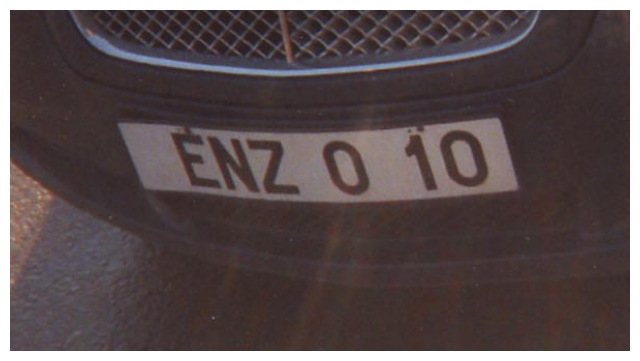

In [73]:
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
cvlib.imgview(img)

In [79]:
im = cv.imread(path+'placa2.jpg')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# adaptive Th
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(330, 600)


In [80]:
contorno = []

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if (cv.contourArea(approx)>350): #pongo el mínimo del área
        contorno.append(c)
len(contorno)

10

In [81]:
horizontales = []
verticales = []
colores = {}
indexes = []
thickness = 1
#(255,0,0),602:(0,255,0)
for cnt in range(len(contorno)):
    x,y,w,h = cv.boundingRect(contorno[cnt])
    #print(f"{w}, {h}")
    if w > h:
        horizontales.append(contorno[cnt])
        colores.update({cnt:(255,0,0)})
    else:
        verticales.append(cnt)
        colores.update({cnt:(0,255,0)})
    indexes.append(cnt)

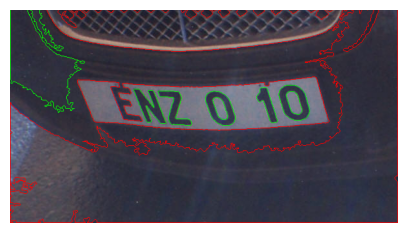

In [82]:
r = im.copy()
# cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
for c in indexes:
    r = cv.drawContours(r, contorno, c, colores[c], thickness)
view(r)

In [83]:
contorno = []

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if (cv.contourArea(approx)>50): #pongo el mínimo del área
        contorno.append(c)
len(contorno)

76

In [84]:
# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(img, mode, method[1])

error: OpenCV(4.8.0) /Users/runner/miniforge3/conda-bld/libopencv_1690022677312/work/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


Idea con tema de: Hough